In [296]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import tensorflow as tf

#Generate data for classfication

In [281]:
def generateData(n1, n2):
    theta = np.random.uniform(0, 2*math.pi, n1 + n2)
    r = np.hstack((np.random.normal(0,0.2,n1),np.random.normal(0.7,0.2,n2)))
    temrcos = []
    temrsin = []
    for i in range(n1 + n2):
        temrcos.append(r[i]*math.cos(theta[i]))
        temrsin.append(r[i]*math.sin(theta[i]))
    y = np.hstack((np.repeat([0],n1),np.repeat([1],n2)))
    return({"x1":temrcos,"x2":temrsin,"y":y})

###generate imbalanced data and do the plot

In [297]:
data = generateData(30,200)

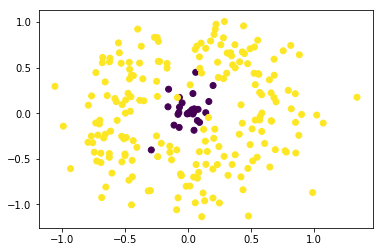

In [298]:
plt.scatter(data["x1"], data["x2"], c=data["y"])
plt.show()

#Deep learning


###transform data

In [299]:
data_x1 = np.float32(data["x1"])[:, np.newaxis]
data_x2 = np.float32(data["x2"])[:, np.newaxis]
data_y = np.float32(data["y"])[:, np.newaxis]
data_test = np.hstack((data_x1, data_x2))
data_test_y = np.ndarray([len(data_y),2])
for i in range(len(data_y)):
    if data_y[i] == 0:
        data_test_y[i,] = [1,0]
    else:
        data_test_y[i,] = [0,1]


###construct the Structure

In [285]:
def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

In [300]:
xs = tf.placeholder(tf.float32, [None, 2])
ys = tf.placeholder(tf.float32, [None, 2])


In [301]:
l1 = add_layer(xs, 2, 10,  activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 2,  activation_function=tf.nn.softmax)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss


train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.Session()

In [302]:
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    
    sess.run(train_step, feed_dict={xs: data_test, ys:data_test_y})
    if i % 50 == 0:
        print(i,sess.run(cross_entropy, feed_dict={xs: data_test, ys:data_test_y}))

0 0.34505
50 0.137027
100 0.108427
150 0.0945963
200 0.0865154
250 0.0812511
300 0.0776042
350 0.0749398


400 0.0728993
450 0.0712131
500 0.0698442
550 0.0687004
600 0.0676318
650 0.0666833
700 0.0658196
750 0.0650455


800 0.0643719
850 0.0638598
900 0.0633456
950 0.0628794


In [303]:
v = sess.run(prediction,feed_dict = {xs : data_test})
print(v[range(5),])

[[ 0.98278773  0.01721227]
 [ 0.89279896  0.10720105]
 [ 0.0966676   0.90333247]
 [ 0.98062301  0.01937696]
 [ 0.96795762  0.03204236]]


In [304]:
x1 = np.linspace(-1.5,1.5,31,np.float32)
x2 = np.linspace(-1.5,1.5,31,np.float32)
X1,X2 = np.meshgrid(x1, x2)
grid = np.ndarray([len(x1)*len(x2),2])
k = 0
for i in range(len(x2)):
    for j in range(len(x1)):
        grid[k,] = [x1[j], x2[i]]
        k = k + 1

In [305]:
prediction_grid = sess.run(prediction,feed_dict = {xs : grid})
prediction_grid_matrix = prediction_grid[range(np.shape(grid)[0]),0].reshape((31,31))


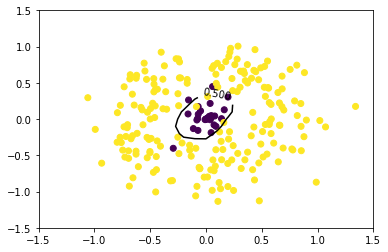

In [306]:
plt.scatter(data["x1"], data["x2"], c=data["y"])
c = plt.contour(X1,
                X2,
                prediction_grid_matrix,
                colors="black",
                levels = [0.5])
plt.clabel(c, inline = True)
plt.show()

#Deal with imblanced data

###put wight on data_test_y

In [307]:
ratio = (30 + 200)/ 30
data_test_y[:,0] = data_test_y[:,0] * ratio 
data_test_y[range(5),:]

array([[ 7.66666667,  0.        ],
       [ 7.66666667,  0.        ],
       [ 7.66666667,  0.        ],
       [ 7.66666667,  0.        ],
       [ 7.66666667,  0.        ]])

In [308]:
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    
    sess.run(train_step, feed_dict={xs: data_test, ys:data_test_y})
    if i % 50 == 0:
        print(i,sess.run(cross_entropy, feed_dict={xs: data_test, ys:data_test_y}))

0 1.1042
50 0.26624
100 0.205883
150 0.180913
200 0.165711
250 0.157944
300 0.15272


350 0.148877
400 0.146916
450 0.145425
500 0.142823
550 0.140698
600 0.139342
650 0.138597
700 0.138677


750 0.137325
800 0.13635
850 0.135996
900 0.135091
950 0.134819


###plot result

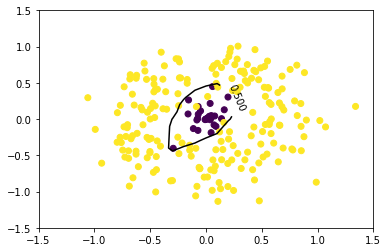

In [309]:
prediction_grid = sess.run(prediction,feed_dict = {xs : grid})
prediction_grid_matrix = prediction_grid[range(np.shape(grid)[0]),0].reshape((31,31))
plt.scatter(data["x1"], data["x2"], c=data["y"])
c = plt.contour(X1,
                X2,
                prediction_grid_matrix,
                colors="black",
                levels = [0.5])
plt.clabel(c, inline = True)
plt.show()